<a href="https://colab.research.google.com/github/mjdileep/Model-Explorer/blob/main/Remove_Image_Backgrounds_with_RMBG_1_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://huggingface.co/briaai/RMBG-1.4
!mv RMBG-1.4/* ./
!pip install -r requirements.txt

Cloning into 'RMBG-1.4'...
remote: Enumerating objects: 288, done.
remote: Counting objects: 100% (150/150), done.
remote: Compressing objects: 100% (150/150), done.
remote: Total 288 (delta 81), reused 0 (delta 0), pack-reused 138
Receiving objects: 100% (288/288), 2.07 MiB | 6.14 MiB/s, done.
Resolving deltas: 100% (152/152), done.
Filtering content: 100% (6/6), 550.52 MiB | 55.14 MiB/s, done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for typing: filename=typing-3.7.4.3-py3-none-any.whl size=26304 sha256=6efc8ee1dff86fc147642ce358adda2e1be04634c33fcf00f1586f4fe3db504b
  Stored in directory: /root/.cache/pip/wheels/7c/d0/9e/1f26ebb66d9e1732e4098bc5a6c2d91f6c9a529838f0284890
Successfully built typing


--2024-02-26 17:21:00--  https://4.img-dpreview.com/files/p/TS600x600~sample_galleries/3002635523/4971879462.jpg
Resolving 4.img-dpreview.com (4.img-dpreview.com)... 104.22.34.206, 172.67.30.66, 104.22.35.206
Connecting to 4.img-dpreview.com (4.img-dpreview.com)|104.22.34.206|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 122297 (119K) [image/jpeg]
Saving to: ‘4971879462.jpg’

4971879462.jpg      100%[===================>] 119.43K  --.-KB/s    in 0.005s  

2024-02-26 17:21:00 (23.4 MB/s) - ‘4971879462.jpg’ saved [122297/122297]



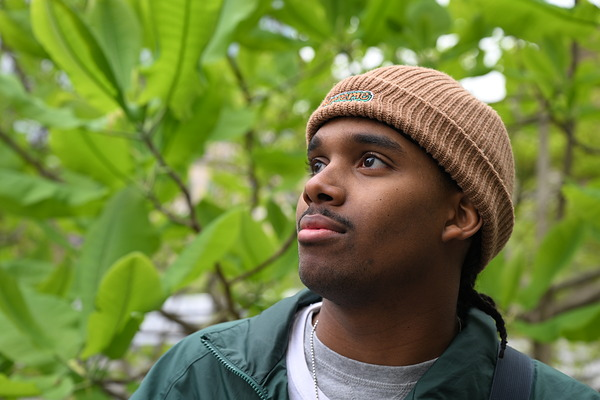

In [2]:
from IPython.display import Image as display_img
!wget https://4.img-dpreview.com/files/p/TS600x600~sample_galleries/3002635523/4971879462.jpg
display_img('4971879462.jpg')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/177M [00:00<?, ?B/s]

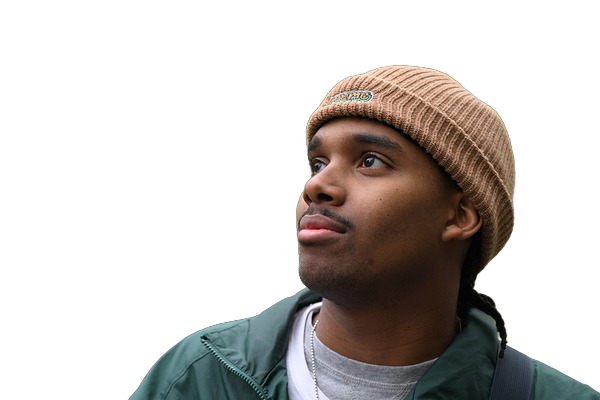

In [3]:
from skimage import io
import torch, os
from PIL import Image
from briarmbg import BriaRMBG
from utilities import preprocess_image, postprocess_image

im_path = "4971879462.jpg"

net = BriaRMBG()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net = BriaRMBG.from_pretrained("briaai/RMBG-1.4")
net.to(device)

# prepare input
model_input_size = [1024,1024]
orig_im = io.imread(im_path)
orig_im_size = orig_im.shape[0:2]
image = preprocess_image(orig_im, model_input_size).to(device)

# inference
result=net(image)

# post process
result_image = postprocess_image(result[0][0], orig_im_size)

# save result
pil_im = Image.fromarray(result_image)
no_bg_image = Image.new("RGBA", pil_im.size, (0,0,0,0))
orig_image = Image.open(im_path)
no_bg_image.paste(orig_image, mask=pil_im)
no_bg_image.save("example_image_no_bg.png")
display_img('example_image_no_bg.png')